In [8]:

import pandas as pd
import matplotlib.pyplot as plt

from cleanerPandasVol.outlier_handler import OutlierHandler
from cleanerPandasVol.scaler import Scaler
from cleanerPandasVol.text_cleaner import TextCleaner
from cleanerPandasVol.feature_engineer import FeatureEngineer
from cleanerPandasVol.data_type_converter import DataTypeConverter
from cleanerPandasVol.categorical_encoder import CategoricalEncoder
from cleanerPandasVol.date_time_handler import DateTimeHandler
from cleanerPandasVol.missing_value_handler import MissingValueHandler


# Load sample data
df = pd.read_csv('synthetic_sample_data.csv')


# Function to plot distributions of numeric columns
def plot_numeric_distributions(df, title):
    df.hist(bins=15, figsize=(15, 10))
    plt.suptitle(title)
    plt.show()

# Function to plot outliers
def plot_outliers(df, outliers, column):
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[column], label='Data')
    plt.scatter(outliers.index, outliers[column], color='red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'Outliers in {column}')
    plt.legend()
    plt.show()

c:\Users\murat\AppData\Local\Programs\Python\Python312\Lib\site-packages\cleanerPandasVol\missing_value_handler.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[column].fillna(self.df[column].mean(), inplace=True)


DataFrame after handling missing values:
     Unnamed: 0   Movie Id            Genre Release Date    Rating  \
0            44  TOYHANVUR           Horror   07/07/1985  9.750176   
1            47  CORCILSLF      Documentary   05/08/1999  7.912876   
2            64  UBWUVIHEL        Adventure   08/05/1996  3.116053   
3            67  CGHMHKJHH          Fantasy   21/07/2018  8.811783   
4            67  WMLWHTAMN          Fantasy   28/10/2011  5.250991   
..          ...        ...              ...          ...       ...   
995          79  FLGKFVWQC            Crime   03/03/2019  9.289647   
996          41  YPFAOWQTB           Action   26/09/1984  8.779748   
997          17  PFOLXESPH            Drama   13/07/2014  3.418956   
998          80  IOENWBYUW          Fantasy   05/12/2004  9.090440   
999          43  LMZTDBXMY  Science Fiction   12/05/1998  7.430801   

                                               Summary Shooting Location  \
0    A group of college students get more 

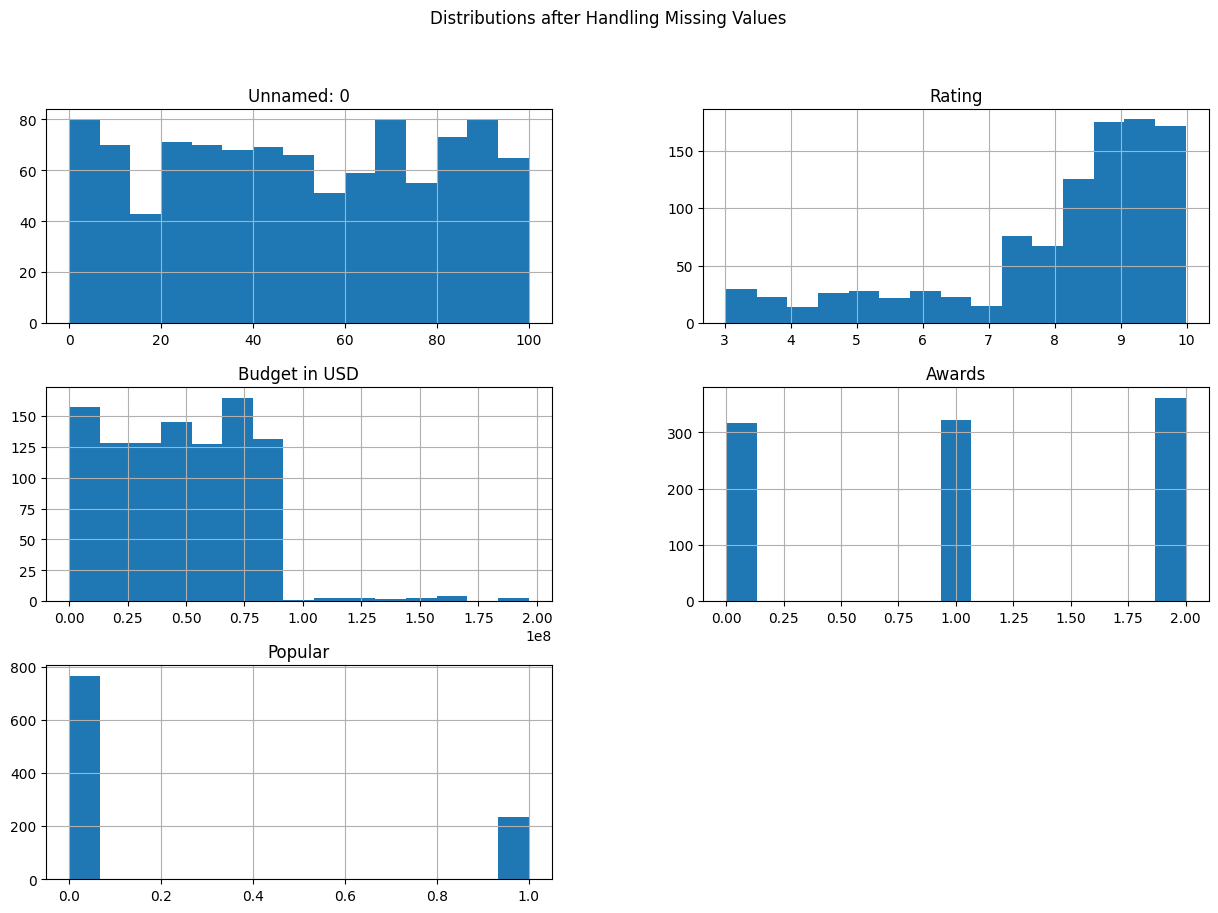

In [9]:
# Handle missing values
mv_handler = MissingValueHandler(df.copy())
numeric_columns = df.select_dtypes(include=['number']).columns
for column in numeric_columns:
    mv_handler.impute_mean(column)
df_cleaned_missingvaluehandler = mv_handler.df

print("DataFrame after handling missing values:")
print(df_cleaned_missingvaluehandler)
plot_numeric_distributions(df_cleaned_missingvaluehandler, 'Distributions after Handling Missing Values')


Outliers in column Unnamed: 0:
Empty DataFrame
Columns: [Unnamed: 0, Movie Id, Genre, Release Date, Rating, Summary, Shooting Location, Budget in USD, Awards, Popular]
Index: []


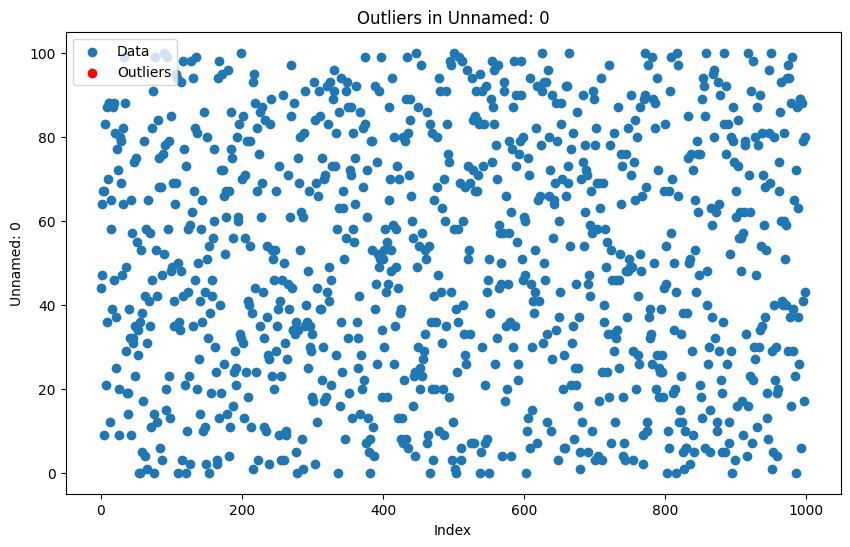


Outliers in column Rating:
     Unnamed: 0   Movie Id            Genre Release Date    Rating  \
2            64  UBWUVIHEL        Adventure   08/05/1996  3.116053   
42           65  SDSESHUSU            Drama   09/03/1996  4.731014   
44           57  LXNSPREJC            Crime   02/06/1986  3.742544   
47           74  ESXJFCHTV           Action   14/11/2005  3.938911   
49           35  ZIYEGEJQL           Comedy   05/12/2015  3.175992   
..          ...        ...              ...          ...       ...   
910          57  PAFFEWPKL            Crime   05/12/1993  3.517212   
984          23  FCFVTXUEW          Romance   18/05/1986  3.655704   
985          72  IPYSUJVYW  Science Fiction   02/02/1997  3.191797   
987          87  TGNVULWKH          History   18/04/2016  4.494439   
997          17  PFOLXESPH            Drama   13/07/2014  3.418956   

                                               Summary Shooting Location  \
2    A lost civilization is rediscovered deep withi... 

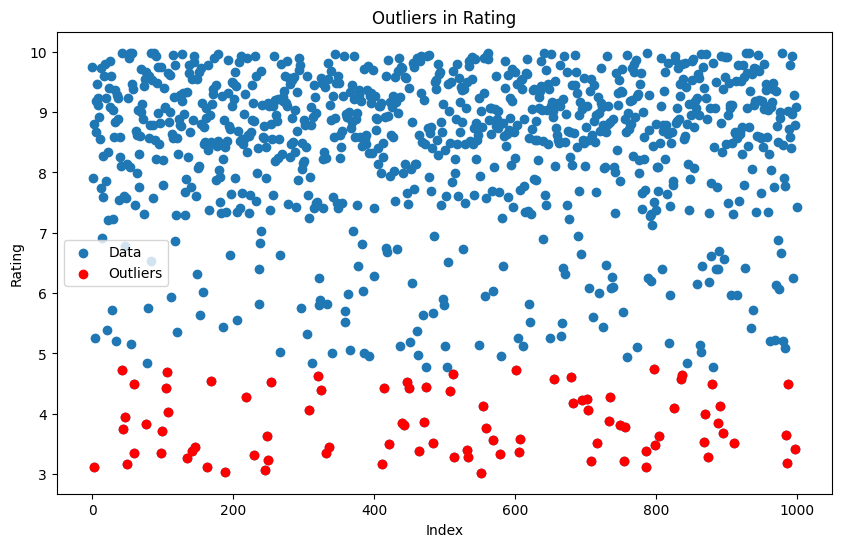


Outliers in column Budget in USD:
     Unnamed: 0   Movie Id            Genre Release Date    Rating  \
191          21  WBTRLMWJJ        Adventure   20/07/1991  8.514183   
211          54  DNJKLTIPK          Romance   30/03/1984  9.934478   
381           0  VAUNKJRXC  Science Fiction   15/04/1981  9.192668   
441          60  MPCSQATBV          Foreign   31/10/1994  7.995073   
492          76  XKNGRXOQO           Comedy   27/10/1992  9.635189   
604          10  XEXXBZKVI          Fantasy   02/09/1983  5.264132   
782          99  LJDLJRNSP           Horror   31/01/1992  8.230334   
823          23  AKEJLNDHB          Romance   19/12/1985  7.786540   
923           7  QJLQQPMGM           Comedy   16/03/1992  9.780598   
951           1  GJQLUBSBD         Thriller   27/08/1984  8.423011   

                                               Summary Shooting Location  \
191  In a post-apocalyptic world overrun by zombies...             Tokyo   
211  A shy bookstore owner finds love with

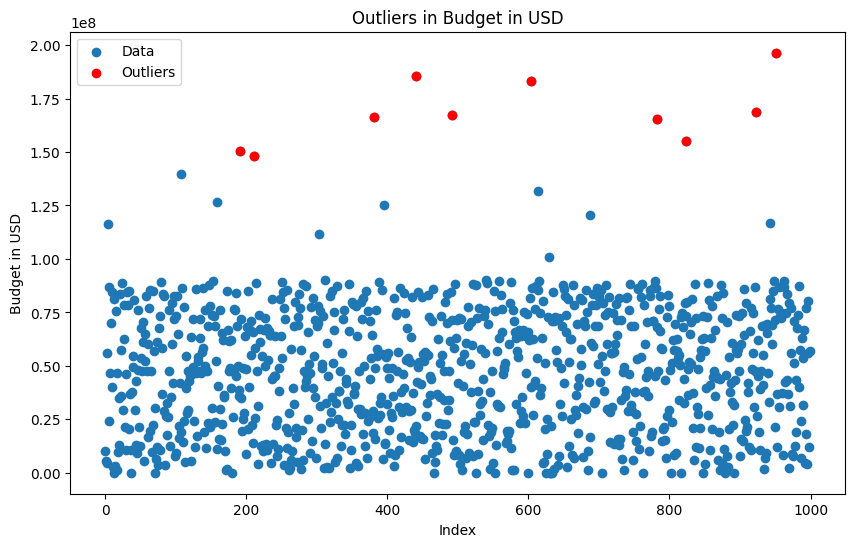


Outliers in column Awards:
Empty DataFrame
Columns: [Unnamed: 0, Movie Id, Genre, Release Date, Rating, Summary, Shooting Location, Budget in USD, Awards, Popular]
Index: []


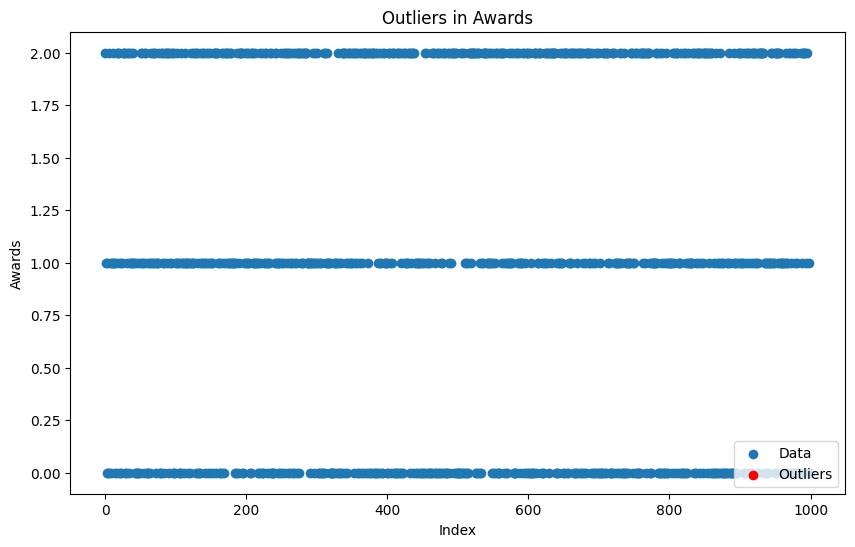


Outliers in column Popular:
     Unnamed: 0   Movie Id        Genre Release Date    Rating  \
0            44  TOYHANVUR       Horror   07/07/1985  9.750176   
1            47  CORCILSLF  Documentary   05/08/1999  7.912876   
3            67  CGHMHKJHH      Fantasy   21/07/2018  8.811783   
5             9  REKCPGLOJ       Comedy   04/06/2013  8.676586   
12           88  VFXKEREAP      Fantasy   29/07/1992  7.742613   
..          ...        ...          ...          ...       ...   
972          59  HEJQZJMLG    Animation   05/02/2010  8.504981   
975          97  BPPUMHZAI       Action   23/10/2009  8.903433   
989          63  QYCQMAUUW  Documentary   23/07/2015  9.789577   
990          26  LDDEULLJG       Family   09/03/1985  8.596629   
993           6  CBMXXMSQA      History   07/06/1985  8.973545   

                                               Summary Shooting Location  \
0    A group of college students get more than they...          New York   
1    A documentary that sh

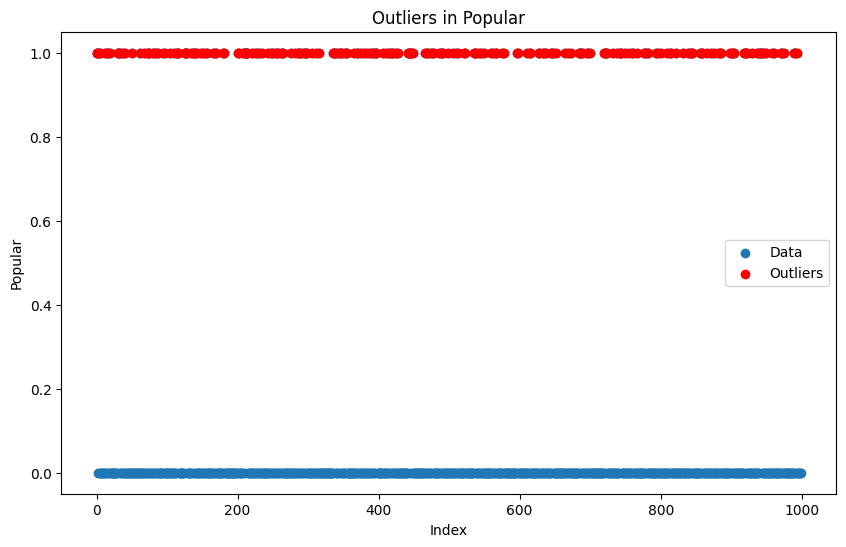


DataFrame after removing outliers from all numeric columns:
     Unnamed: 0   Movie Id            Genre Release Date    Rating  \
0            44  TOYHANVUR           Horror   07/07/1985  9.750176   
1            47  CORCILSLF      Documentary   05/08/1999  7.912876   
3            67  CGHMHKJHH          Fantasy   21/07/2018  8.811783   
4            67  WMLWHTAMN          Fantasy   28/10/2011  5.250991   
5             9  REKCPGLOJ           Comedy   04/06/2013  8.676586   
..          ...        ...              ...          ...       ...   
994          88  OBMRPFCOM          Fantasy   23/03/2018  6.250496   
995          79  FLGKFVWQC            Crime   03/03/2019  9.289647   
996          41  YPFAOWQTB           Action   26/09/1984  8.779748   
998          80  IOENWBYUW          Fantasy   05/12/2004  9.090440   
999          43  LMZTDBXMY  Science Fiction   12/05/1998  7.430801   

                                               Summary Shooting Location  \
0    A group of colleg

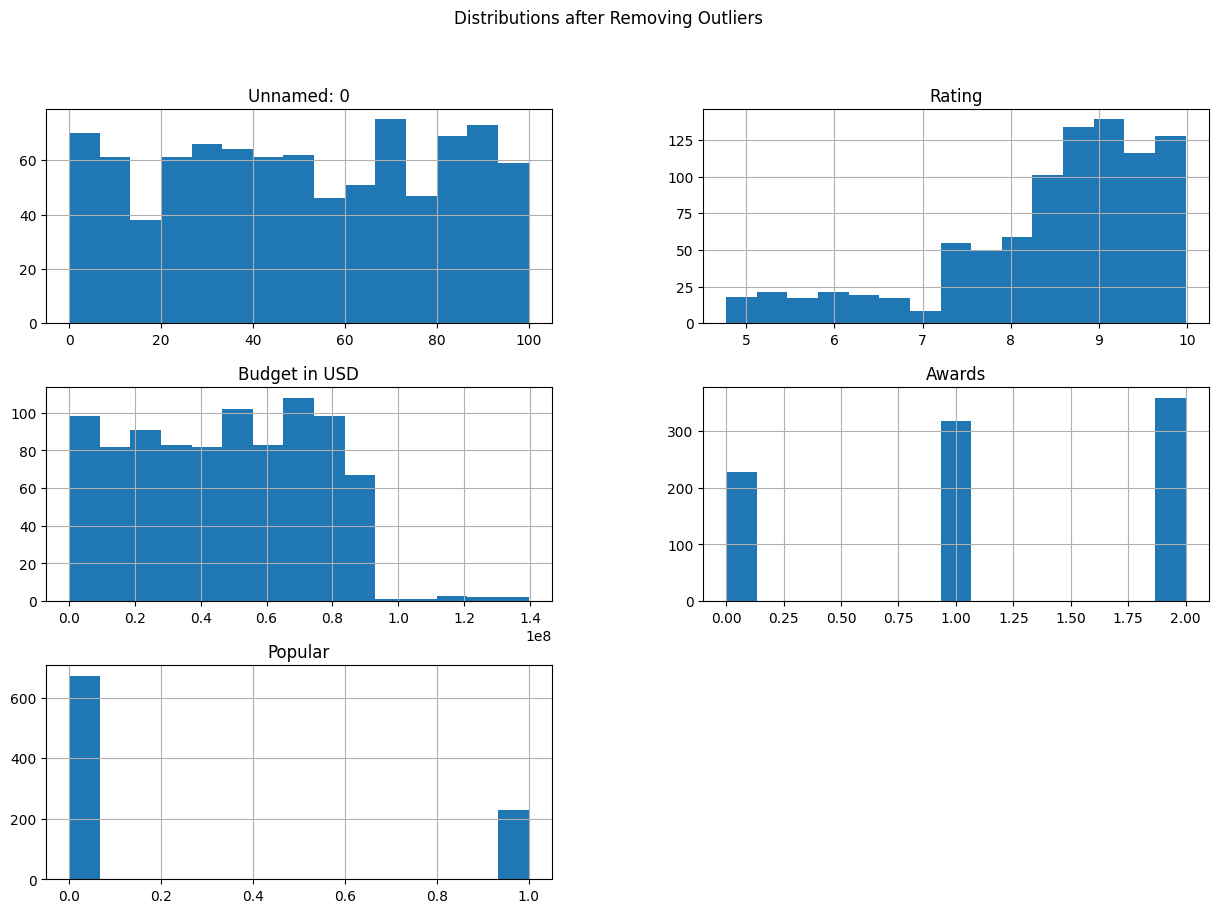

In [10]:
# Handle outliers dynamically
outlier_handler = OutlierHandler(df_cleaned_missingvaluehandler.copy())
outliers = outlier_handler.iqr_outliers_all()
for column, outlier_df in outliers.items():
    print(f"\nOutliers in column {column}:")
    print(outlier_df)
    plot_outliers(df_cleaned_missingvaluehandler, outlier_df, column)

df_cleaned_outlierhandler = outlier_handler.remove_iqr_outliers_all()
print("\nDataFrame after removing outliers from all numeric columns:")
print(df_cleaned_outlierhandler)
plot_numeric_distributions(df_cleaned_outlierhandler, 'Distributions after Removing Outliers')



DataFrame after scaling numeric columns:
     Unnamed: 0    Rating  Budget in USD    Awards   Popular
0     -0.221691  1.045881      -1.320642  1.077785  1.710581
1     -0.119433 -0.436541      -1.489314 -0.184524  1.710581
3      0.562286  0.288740      -1.536640 -0.184524  1.710581
4      0.562286 -2.584279       2.538403 -1.446832 -0.584597
5     -1.414699  0.179657      -0.821485  1.077785  1.710581
..          ...       ...            ...       ...       ...
994    1.278091 -1.777829      -1.043365 -1.446832 -0.584597
995    0.971317  0.674304      -1.553909  1.077785 -0.584597
996   -0.323949  0.262893       1.229367 -1.446832 -0.584597
998    1.005403  0.513575      -1.258003 -0.184524 -0.584597
999   -0.255777 -0.825503       0.372708 -1.446832 -0.584597

[903 rows x 5 columns]


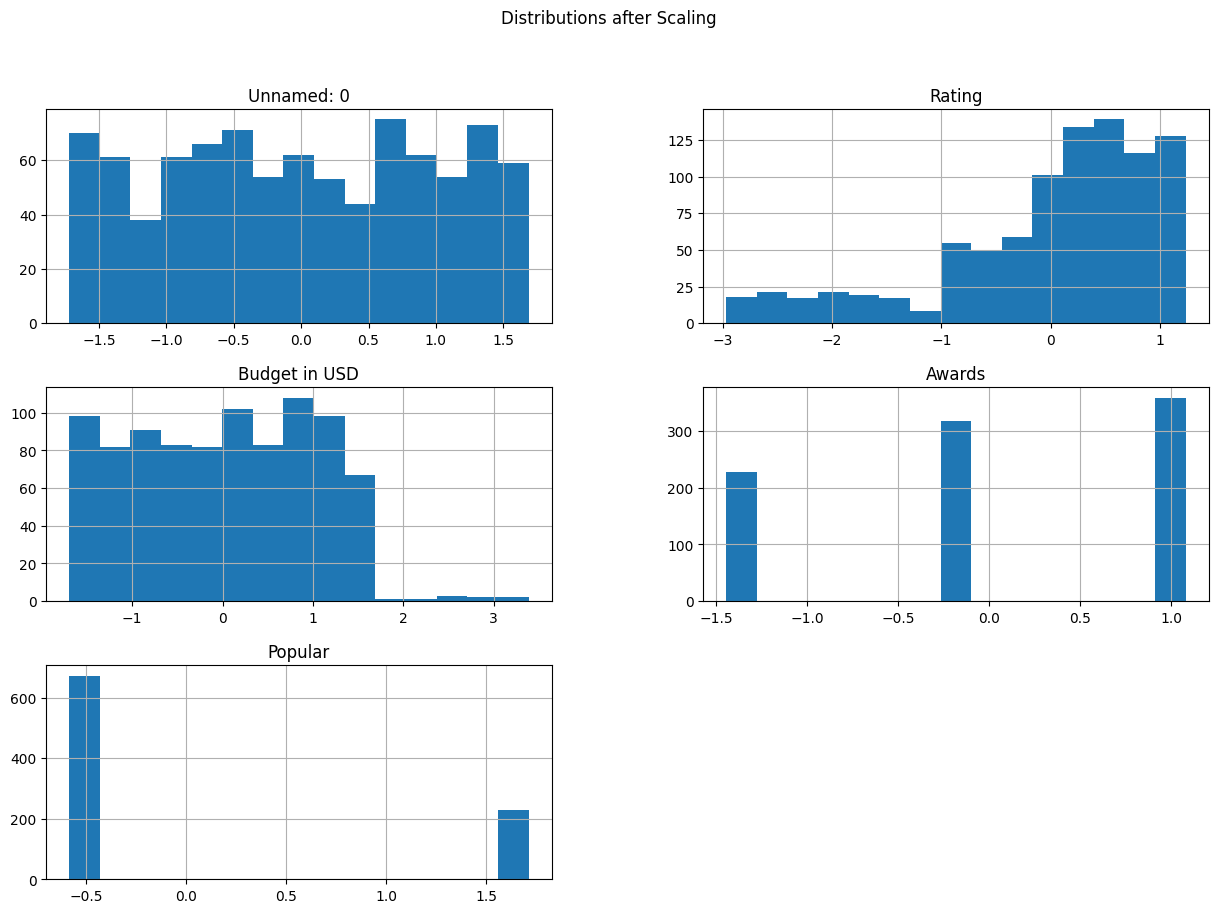

In [11]:
# Scale all numeric columns
scaler = Scaler(df_cleaned_outlierhandler.copy())
scaler.standard_scaler(numeric_columns)
df_cleaned_scaler = scaler.df

print("\nDataFrame after scaling numeric columns:")
print(df_cleaned_scaler[numeric_columns])
plot_numeric_distributions(df_cleaned_scaler, 'Distributions after Scaling')



In [12]:
# Clean text for all object type columns that are likely text
df_cleaned_textcleaner = df_cleaned_scaler.copy()
text_columns = df_cleaned_textcleaner.select_dtypes(include=['object']).columns
for column in text_columns:
    text_cleaner = TextCleaner(df_cleaned_textcleaner, column)
    df_cleaned_textcleaner = text_cleaner.to_lowercase()
    df_cleaned_textcleaner = text_cleaner.remove_punctuation()
    df_cleaned_textcleaner = text_cleaner.remove_stopwords()
    df_cleaned_textcleaner = text_cleaner.lemmatize()

print("\nDataFrame after cleaning text columns:")
print(df_cleaned_textcleaner[text_columns])



DataFrame after cleaning text columns:
      Movie Id            Genre Release Date  \
0    toyhanvur           horror     07071985   
1    corcilslf      documentary     05081999   
3    cghmhkjhh          fantasy     21072018   
4    wmlwhtamn          fantasy     28102011   
5    rekcpgloj           comedy     04062013   
..         ...              ...          ...   
994  obmrpfcom          fantasy     23032018   
995  flgkfvwqc            crime     03032019   
996  ypfaowqtb           action     26091984   
998  ioenwbyuw          fantasy     05122004   
999  lmztdbxmy  science fiction     12051998   

                                               Summary Shooting Location  
0    group college student get bargained spend week...          new york  
1    documentary shed light devastating effect clim...             paris  
3    young inventor build time machine embarks jour...             paris  
4    young inventor build time machine embarks jour...            sydney  
5    hea


DataFrame after adding interaction terms between numeric columns:
     Unnamed: 0   Movie Id            Genre Release Date    Rating  \
0     -0.221691  toyhanvur           horror     07071985  1.045881   
1     -0.119433  corcilslf      documentary     05081999 -0.436541   
3      0.562286  cghmhkjhh          fantasy     21072018  0.288740   
4      0.562286  wmlwhtamn          fantasy     28102011 -2.584279   
5     -1.414699  rekcpgloj           comedy     04062013  0.179657   
..          ...        ...              ...          ...       ...   
994    1.278091  obmrpfcom          fantasy     23032018 -1.777829   
995    0.971317  flgkfvwqc            crime     03032019  0.674304   
996   -0.323949  ypfaowqtb           action     26091984  0.262893   
998    1.005403  ioenwbyuw          fantasy     05122004  0.513575   
999   -0.255777  lmztdbxmy  science fiction     12051998 -0.825503   

                                               Summary Shooting Location  \
0    group colle

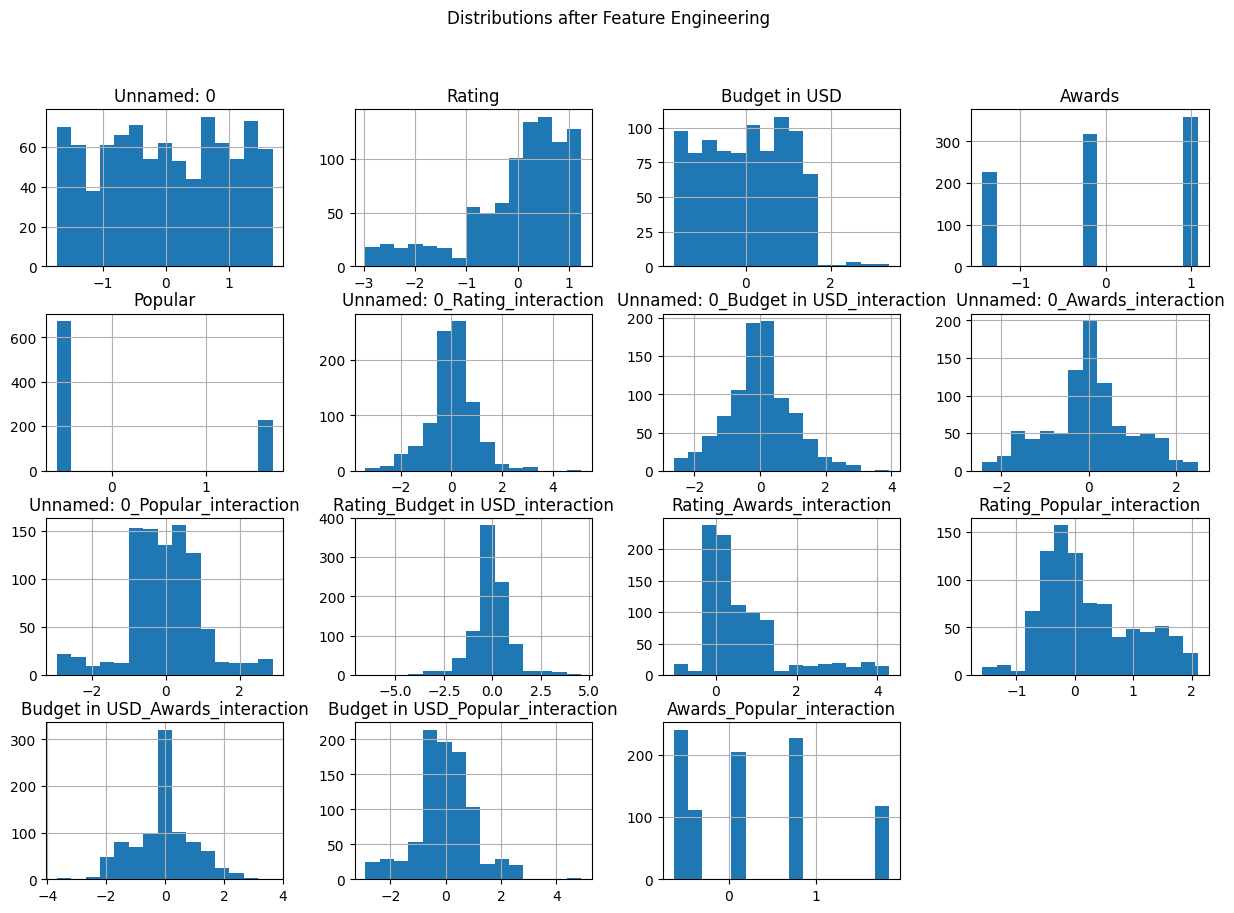

In [13]:
# Feature engineering - add interaction term for all numeric columns pairs (example)
df_cleaned_featureengineer = df_cleaned_textcleaner.copy()
feature_engineer = FeatureEngineer(df_cleaned_featureengineer)
for i, col1 in enumerate(numeric_columns):
    for col2 in numeric_columns[i+1:]:
        interaction_term = f'{col1}_{col2}_interaction'
        df_cleaned_featureengineer = feature_engineer.add_interaction_term(col1, col2, interaction_term)

print("\nDataFrame after adding interaction terms between numeric columns:")
print(df_cleaned_featureengineer)
plot_numeric_distributions(df_cleaned_featureengineer, 'Distributions after Feature Engineering')


In [14]:
# Convert all object columns to categorical and specified columns to numeric
df_cleaned_datatypeconverter = df_cleaned_featureengineer.copy()
data_type_converter = DataTypeConverter(df_cleaned_datatypeconverter)
df_cleaned_datatypeconverter = data_type_converter.to_categorical(text_columns)
df_cleaned_datatypeconverter = data_type_converter.to_numeric(numeric_columns)

print("\nDataFrame after converting text columns to categorical and numeric columns to numeric:")
print(df_cleaned_datatypeconverter.dtypes)


DataFrame after converting text columns to categorical and numeric columns to numeric:
Unnamed: 0                               float64
Movie Id                                category
Genre                                   category
Release Date                            category
Rating                                   float64
Summary                                 category
Shooting Location                       category
Budget in USD                            float64
Awards                                   float64
Popular                                  float64
Unnamed: 0_Rating_interaction            float64
Unnamed: 0_Budget in USD_interaction     float64
Unnamed: 0_Awards_interaction            float64
Unnamed: 0_Popular_interaction           float64
Rating_Budget in USD_interaction         float64
Rating_Awards_interaction                float64
Rating_Popular_interaction               float64
Budget in USD_Awards_interaction         float64
Budget in USD_Popular_interact

In [15]:
# One-hot encode all categorical columns
df_cleaned_categoricalencoder = df_cleaned_datatypeconverter.copy()
categorical_encoder = CategoricalEncoder(df_cleaned_categoricalencoder)
for column in text_columns:
    df_cleaned_categoricalencoder = categorical_encoder.one_hot_encode(column)

print("\nDataFrame after one-hot encoding categorical columns:")
print(df_cleaned_categoricalencoder)


DataFrame after one-hot encoding categorical columns:
     Unnamed: 0    Rating  Budget in USD    Awards   Popular  \
0     -0.221691  1.045881      -1.320642  1.077785  1.710581   
1     -0.119433 -0.436541      -1.489314 -0.184524  1.710581   
3      0.562286  0.288740      -1.536640 -0.184524  1.710581   
4      0.562286 -2.584279       2.538403 -1.446832 -0.584597   
5     -1.414699  0.179657      -0.821485  1.077785  1.710581   
..          ...       ...            ...       ...       ...   
951         NaN       NaN            NaN       NaN       NaN   
984         NaN       NaN            NaN       NaN       NaN   
985         NaN       NaN            NaN       NaN       NaN   
987         NaN       NaN            NaN       NaN       NaN   
997         NaN       NaN            NaN       NaN       NaN   

     Unnamed: 0_Rating_interaction  Unnamed: 0_Budget in USD_interaction  \
0                        -0.231862                              0.292774   
1                       

In [16]:

# Handle datetime columns dynamically
df_cleaned_datetimehandler = df_cleaned_categoricalencoder.copy()
date_columns = df_cleaned_datetimehandler.select_dtypes(include=['object']).columns  # Assuming date columns are initially in object type
datetime_handler = DateTimeHandler(df_cleaned_datetimehandler)
for column in date_columns:
    df_cleaned_datetimehandler = datetime_handler.to_datetime(column)
    df_cleaned_datetimehandler = datetime_handler.extract_date_parts(column)

print("\nDataFrame after handling datetime columns:")
print(df_cleaned_datetimehandler)


DataFrame after handling datetime columns:
     Unnamed: 0    Rating  Budget in USD    Awards   Popular  \
0     -0.221691  1.045881      -1.320642  1.077785  1.710581   
1     -0.119433 -0.436541      -1.489314 -0.184524  1.710581   
3      0.562286  0.288740      -1.536640 -0.184524  1.710581   
4      0.562286 -2.584279       2.538403 -1.446832 -0.584597   
5     -1.414699  0.179657      -0.821485  1.077785  1.710581   
..          ...       ...            ...       ...       ...   
951         NaN       NaN            NaN       NaN       NaN   
984         NaN       NaN            NaN       NaN       NaN   
985         NaN       NaN            NaN       NaN       NaN   
987         NaN       NaN            NaN       NaN       NaN   
997         NaN       NaN            NaN       NaN       NaN   

     Unnamed: 0_Rating_interaction  Unnamed: 0_Budget in USD_interaction  \
0                        -0.231862                              0.292774   
1                         0.052137 